#**Q2(a).**

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from pylab import *

import random

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
mnist_train = pd.read_csv("mnist_train.csv")

In [ ]:
np.shape(mnist_train)

(60000, 785)

In [ ]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train = mnist_train.loc[mnist_train['label'].isin([3, 8])]

In [ ]:
X = mnist_train.iloc[:,1:785]
y = mnist_train.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [ ]:
lda = LDA(n_components=1)
X_train_r2 = lda.fit(X_train, y_train)

In [ ]:
y_pred = lda.predict(X_test)
print("Accuracy before attack: ",accuracy_score(y_test, y_pred))
print(y_pred.shape)

Accuracy before attack:  0.958898393490507
(4793,)


In [ ]:
print(
    f"Classification report for classifier {lda}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)
w0 = lda.intercept_
w = lda.coef_
print(f"Bias: \n{w0}")
print(f"\n\nWeights: \n{w}")

Classification report for classifier LinearDiscriminantAnalysis(n_components=1):
              precision    recall  f1-score   support

           3       0.96      0.96      0.96      2416
           8       0.96      0.96      0.96      2377

    accuracy                           0.96      4793
   macro avg       0.96      0.96      0.96      4793
weighted avg       0.96      0.96      0.96      4793


Bias: 
[-3.17727711]


Weights: 
[[-2.82283584e-15  8.59828320e-15 -2.41927028e-14  6.03506816e-14
  -5.53615762e-14 -8.40779234e-14  6.92086552e-15  3.04409166e-14
   1.64282187e-14  3.66697707e-14  2.95647173e-14  3.34854990e-14
  -1.73056288e-14  7.77292424e-14 -8.78820157e-15 -5.73656752e-14
   4.45487183e-14  2.12057047e-14 -1.99494010e-14 -1.10414239e-14
   3.71759833e-14 -2.23196805e-14 -3.00045701e-14  6.33454585e-15
  -4.08940608e-14 -2.47281754e-14  8.68704663e-16  1.23999354e-14
  -1.13670359e-14  3.73241122e-14  6.37423747e-14  2.58077417e-14
   6.78650800e-15  3.13822453e

Confusion matrix before attack:
[[2321   95]
 [ 102 2275]]


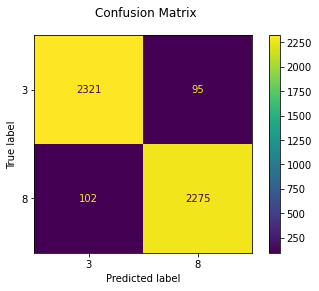

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix before attack:\n{disp.confusion_matrix}")

plt.show()

#**Q2(b).**

In [ ]:
X_test_final = X_test.to_numpy(dtype = 'uint8')


In [ ]:
X_attack=X_test_final-((X_test_final@np.transpose(w)+w0)@w)/np.linalg.norm(w)
print(X_attack.shape)

(4793, 784)


In [ ]:
Y_attack=lda.predict(X_attack)
print(Y_attack.shape)

(4793,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Accuracy after attack: ",accuracy_score(y_test, Y_attack))

Accuracy after attack:  0.04110160650949301


In [ ]:
print(f"Classification report for classifier {lda}:\n"
     f"{metrics.classification_report(y_test, Y_attack)}\n")

Classification report for classifier LinearDiscriminantAnalysis(n_components=1):
              precision    recall  f1-score   support

           3       0.04      0.04      0.04      2416
           8       0.04      0.04      0.04      2377

    accuracy                           0.04      4793
   macro avg       0.04      0.04      0.04      4793
weighted avg       0.04      0.04      0.04      4793




Confusion matrix:
[[  95 2321]
 [2275  102]]


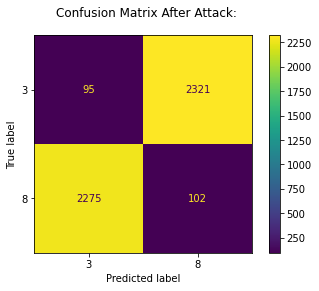

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_attack)
disp.figure_.suptitle("Confusion Matrix After Attack:")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
X_attack_res=X_attack.reshape(X_attack.shape[0],28,28)

889


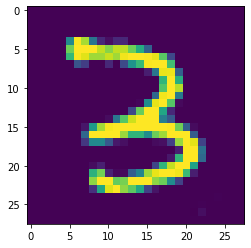

58


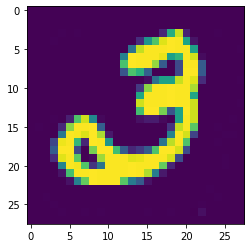

1813


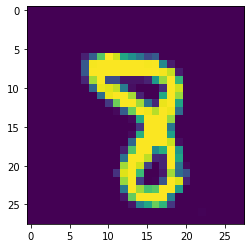

1993


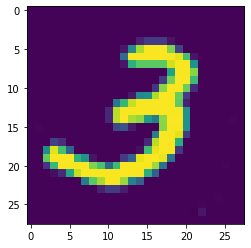

3635


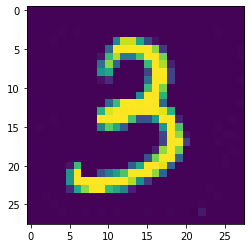

2067


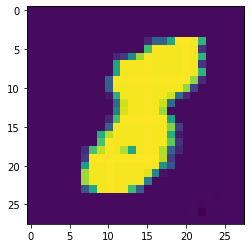

2509


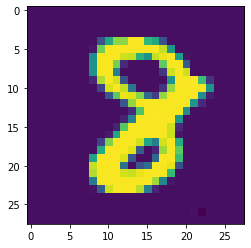

617


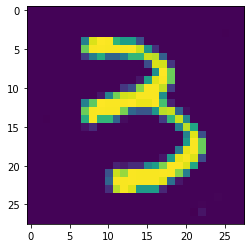

609


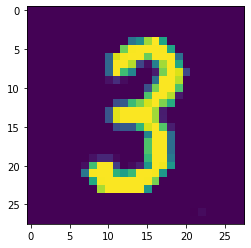

3838


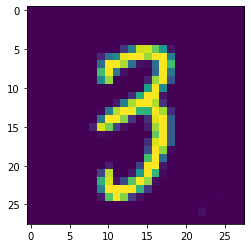

In [ ]:
for i in range(0,10):
    s=random.randint(0,X_attack.shape[0])
    print(s)
    plt.imshow(X_attack_res[s])
    plt.show()